In [ ]:
Notes for scipy.stats and statsmodles

## scipy.stats

### descriptive statistics,
    - random numbers
    - variables, 
    - distributions, 
    - hypothesis testing.

In [1]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set(style="whitegrid")

### Random number

In [5]:
np.random.rand() # out range: [0, 1)

0.8905614992687015

In [6]:
np.random.randn() # out normal distribution 

0.5517135187940928

In [39]:
np.random.randn(2, 6)

array([[ 0.16664115,  0.73358091, -1.97976152, -0.22756861,  0.15078566,
        -1.29204922],
       [ 0.47859247,  0.69518869, -0.26438891, -0.22916497,  0.7121722 ,
         0.69035677]])

In [38]:
np.random.randint(2, 6) #integers between a given low (inclusive) and high (exclusive) value

4

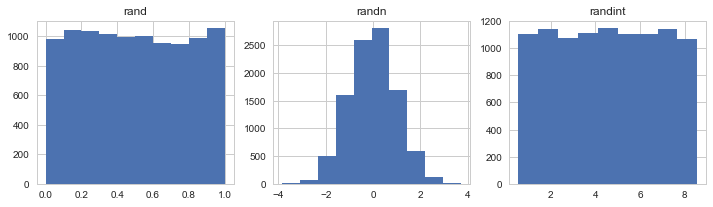

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint")

In [22]:
# sample solution:
np.random.choice(10, 5, replace=False)

array([5, 7, 2, 3, 0])

In [23]:
np.random.seed(123456789)
np.random.rand()

0.532833024789759

In [28]:
prng = np.random.RandomState(123456789)
prng.rand(2, 4)

array([[ 0.53283302,  0.5341366 ,  0.50955304,  0.71356403],
       [ 0.25699895,  0.75269361,  0.88387918,  0.15489908]])

In [29]:
prng = np.random.RandomState(123456789)
prng.rand(2, 4)

array([[ 0.53283302,  0.5341366 ,  0.50955304,  0.71356403],
       [ 0.25699895,  0.75269361,  0.88387918,  0.15489908]])

In [32]:
prng.chisquare(1, size=(2,2))

array([[  1.00418922e+00,   1.26859720e+00],
       [  2.02731988e+00,   2.52605129e-05]])

In [33]:
prng.standard_t(1, size=(2,3))

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [40]:
prng.f(5, 2, size=(2,4))

array([[  1.21823269,   3.47619315,   0.50835525,   0.70599655],
       [ 12.08835081,  12.77671082,   2.36942737,   4.41241942]])

### Distribution:

In [43]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF or PMF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))

    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)
    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, "pdf"):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        # discrete random variables do not have a pdf method, instead we use pmf:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")  # Survival function (1 – cdf)
    axes[2].plot(x999, X.ppf(x999), label="PPF") # Percent-point function (inverse of cdf)

    for ax in axes:
        ax.legend()

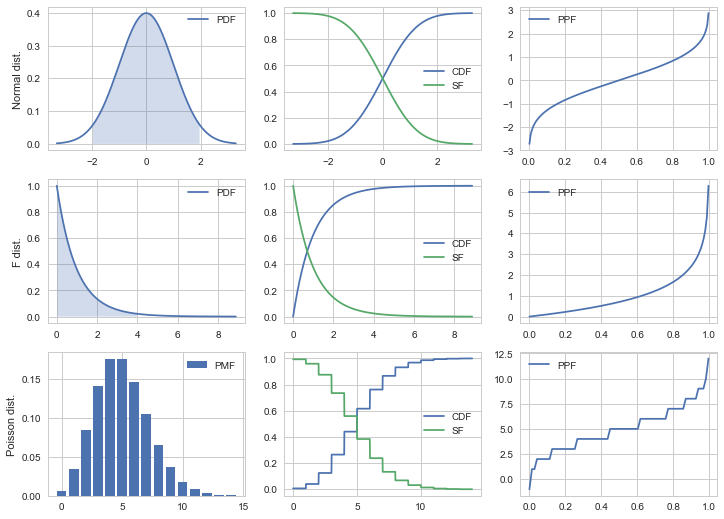

In [44]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

In [45]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)
    ax.hist(X_samples, label="samples", normed=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()

    if title:
        ax.set_title(title)
    return ax

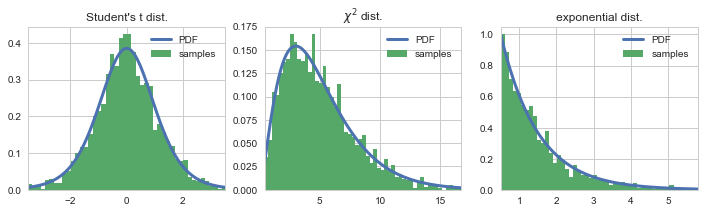

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
N = 2000
# Student's t distribution
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(N), "Student's t dist.", ax=axes[0]) # rvs: Random variable samples
# The chisquared distribution
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(N), r"$\chi^2$ dist.", ax=axes[1])
# The exponential distribution
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(N), "exponential dist.", ax=axes[2])

###  Hypothesis Testing

It is a systematic methodology for evaluating if a claim, or a hypothesis, is reasonable or not, on the basis of data.
- null hypothesis, H0, which represents the currently accepted state of knowledge
- alternative hypothesis, Ha, which represent a new claim that challenges the current state of knowledge

**p-value**: obtaining the observed value of the test statistics (or a more extreme one) using the distribution function that is implied by the null hypothesis.
>  If the p-value is smaller than significance level, and denoted by a (typically 5% or 1%), we can conclude that the observed data is unlikely to have been described by the distribution corresponding to the null hypothesis. reject the null hypothesis in favor of the alternative hypothesis

Steps for carrying out a hypothesis test:

1. Formulate the null hypothesis and the alternative hypothesis.
2. Select a test statistics such that its sampling distribution under the null hypothesis is known (exactly or approximately).
3. Collect data.
4. Compute the test statistics from the data and calculate its p-value under the null hypothesis.
5. If the p-value is **smaller** than the predetermined significance level alpha, we reject the null hypothesis. If the p-value is larger, we fail to reject the null hypothesis.

<table class="table table-bordered table-striped table-condensed">
    <tr>
        <td>Null Hypothesis</td> 
        <td>Distributions</td>
        <td>SciPy Functions for Test</td>
    </tr>
    <tr>
        <td>Test if the mean of a population is a given value</td> 
        <td>Normal distribution(stats.norm) or Student’s t distribution(stats.t)</td> 
        <td>stats.ttest_1samp</td>
    </tr>
    <tr>
        <td>Test if the means of two random variables are equal (independent or paired samples)</td> 
        <td>Student’s t distribution(stats.t)</td>
        <td>stats.ttest_ind, stats.ttest_rel</td>
    </tr>
    <tr>
        <td>Test goodness of fit of a continuous distribution to data</td>
        <td>Kolmogorov-Smirnov distribution</td>
        <td>stats.kstest</td>
    </tr>
    <tr>
        <td>Test if categorical data occur with given frequency 
        (sum of squared normal distributed variables)</td>
        <td>stats.chi2</td>
        <td>stats.chisquare</td>
    </tr>
    <tr>
        <td>Test for independence of categorical variables in a contingency table.</td>
        <td>stats.chi2</td>
        <td>stats.chi2_contingency</td>
    </tr>
    <tr>
        <td>Test for equal variance in samples of two or more variables.</td>
        <td>F distribution (stats.f)</td>
        <td>stats.barlett, stats.levene</td>
    </tr>
    <tr>
        <td>Test for non-correlation between two variables.</td>
        <td>Beta distribution (stats.beta, stasts.mstats.betai)</td>
        <td>stats.pearsonr, stats.spearmanr</td>
    </tr>
    <tr>
        <td>Test if two or more variables have the same population mean
        (ANOVA – analysis of variance).</td>
        <td>F distribution</td> 
        <td>stats.f_oneway, stats.kruska</td>
    </tr>

In [8]:
mu0, mu, sigma = 1.0, 0.8, 0.5  # null hypothesis mu = 1.0
X = stats.norm(mu, sigma)
n = 100
X_samples = X.rvs(n)

z = (X_samples.mean() - mu0) / (sigma / np.sqrt(n)) # X_sample mean is mu
z

-5.0789167445240802

In [9]:
# sample standard deviation
t = (X_samples.mean() - mu0) / (X_samples.std(ddof=1) / np.sqrt(n))
t

-5.2834722243812697

In [13]:
# threshold value 
stats.norm().ppf(0.025) # p-value: 0.05 / 2

-1.9599639845400545

In [14]:
stats.norm().ppf(0.005) # p-value 0.01

-2.5758293035489008

In [ ]:
# upper shows p-value < p=0.01, reject H0.

In [16]:
t1, p1 = stats.ttest_1samp(X_samples, mu)
print('t:', t1, '\n', 'p-value:', p1)

t: -1.12237056421 
 p-value: 0.264419620894


In [ ]:
p-value > -1.9599639845400545, # support H0: mu=0.8

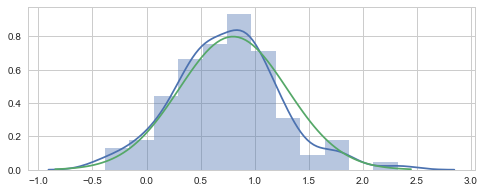

In [15]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

In [64]:
t, p = stats.ttest_1samp(X_samples, mu0) 
print(t, '\n', p)

-3.19849319799 
 0.00185582606583


### Nonparametric Methods

kernel-density estimation (KDE) construct a representation of an unknown distribution function

In [31]:
X = stats.chi2(df=5)
X_samples = X.rvs(100)

# kde
kde = stats.kde.gaussian_kde(X_samples)
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)

In [23]:
sns.distplot? 
# Flexibly plot a univariate distribution of observations

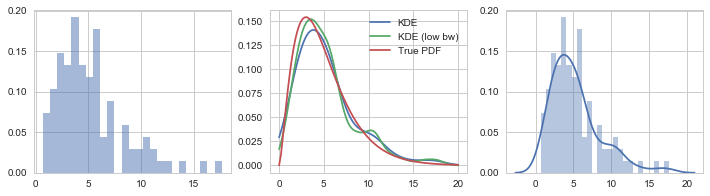

In [32]:
x = np.linspace(0, 20, 100)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(X_samples, normed=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

## Statsmodels



In [39]:
# fitting models to data rather than probability distributions 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

C:\Users\lpeng\AppData\Local\Continuum\Anaconda3\envs\pml\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [37]:
import numpy as np
import pandas as pd
N = 100
x1 = np.random.randn(N)
x2 = np.random.randn(N)
data = pd.DataFrame({"x1": x1, "x2": x2})
data["y_true"] = 1 + 2 * x1 + 3 * x2 + 4 * x1 * x2 # target function
# adding some noises
e = 0.5 * np.random.randn(N)
data["y"] = data["y_true"] + e
data.head()

,x1,x2,y_true,y
0,-0.666848,-0.804750,-0.601362,-0.845227
1,0.530177,0.049274,2.312674,2.407324
2,-0.278964,-0.405930,-0.322758,-0.755152
3,-0.356972,-0.409842,-0.358262,-0.573334
4,-0.171520,-0.549772,-0.615167,-0.601259


In [40]:
model = smf.ols("y ~ x1 + x2", data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     22.62
Date:                Thu, 06 Jul 2017   Prob (F-statistic):           8.66e-09
Time:                        15:20:20   Log-Likelihood:                -276.42
No. Observations:                 100   AIC:                             558.8
Df Residuals:                      97   BIC:                             566.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8211      0.390      2.106      0.0

In [41]:
z, p = stats.normaltest(result.fittedvalues.values)
p

0.97075319855258724

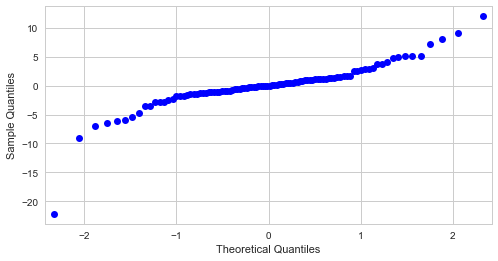

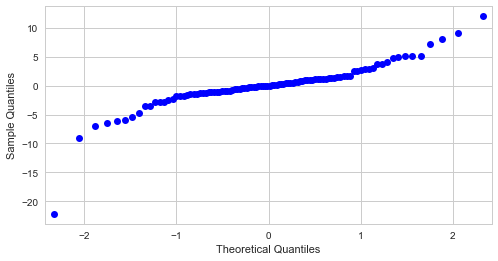

In [45]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

In [46]:
model = smf.ols("y ~ x1 + x2 + x1 * x2", data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     2577.
Date:                Thu, 06 Jul 2017   Prob (F-statistic):           1.41e-91
Time:                        15:24:21   Log-Likelihood:                -75.502
No. Observations:                 100   AIC:                             159.0
Df Residuals:                      96   BIC:                             169.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0395      0.053     19.749      0.0

P: 1.17473699226e-05


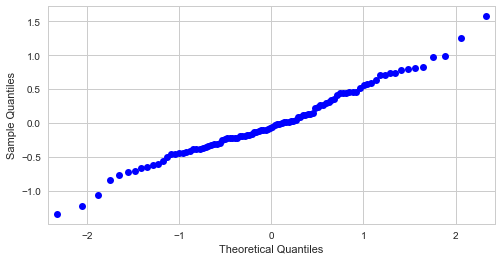

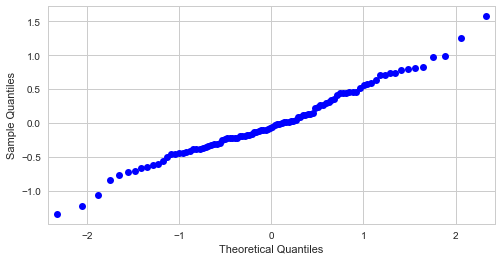

In [47]:
z, p = stats.normaltest(result.fittedvalues.values)
print('P:', p)

fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

In [48]:
result.params

Intercept    1.039480
x1           2.011200
x2           3.104967
x1:x2        4.066298
dtype: float64

In [53]:
# prediction
x = np.linspace(-1, 1, 50)
X1, X2 = np.meshgrid(x, x)
new_data = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})

y_pred = result.predict(new_data)
y_pred = y_pred.reshape(50,50)

C:\Users\lpeng\AppData\Local\Continuum\Anaconda3\envs\pml\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [69]:
def y_out(x, y):
    return 1 + 2 * x1 + 3 * x2 + 4 * x1 * x2

In [71]:
y_true = y_out(X1, X2 )
y_true.shape

(100,)

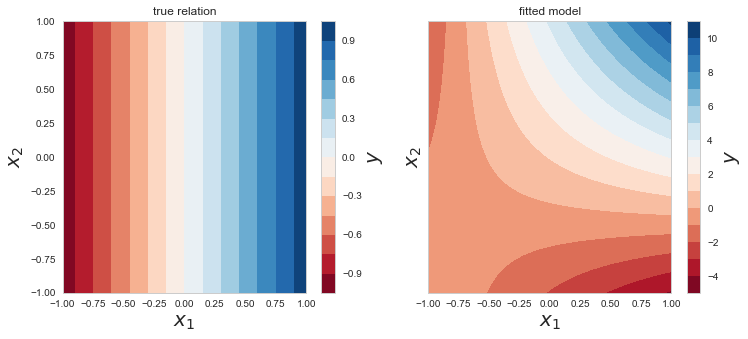

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

def plot_y_contour(ax, Y, title):
    c = ax.contourf(X1, X2, Y, 15, cmap=plt.cm.RdBu)
    ax.set_xlabel(r"$x_1$", fontsize=20)
    ax.set_ylabel(r"$x_2$", fontsize=20)
    ax.set_title(title)
    cb = fig.colorbar(c, ax=ax)
    cb.set_label(r"$y$", fontsize=20)
    
plot_y_contour(axes[0], X1, "true relation")
plot_y_contour(axes[1], y_pred, "fitted model")